# ML miniproject #2

* 스마트폰 수집 신호를 이용한 인간 행위 인식

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


-> subject와 Activity에서 비슷한 데이터가 연속되어서 나옴.

-> shuffle 해주기!

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)

In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1712,0.206222,-0.002444,-0.071268,-0.178156,0.314980,-0.370122,-0.213753,0.216711,-0.368822,0.036552,...,-0.916664,0.588119,-0.052703,0.894190,-0.070566,-0.755230,0.267155,0.024679,8,WALKING
3977,0.282294,-0.012231,-0.099561,-0.996835,-0.987955,-0.993352,-0.997153,-0.986303,-0.992624,-0.937254,...,-0.978980,0.062581,0.750819,0.511346,0.251906,-0.651619,0.298838,0.152565,21,STANDING
1234,0.273758,-0.017118,-0.103736,-0.987935,-0.979853,-0.946703,-0.990838,-0.982117,-0.942339,-0.923553,...,-0.865377,-0.040124,0.017382,-0.681370,0.738651,0.595019,-0.953621,-0.035593,6,LAYING
6110,0.276925,-0.016379,-0.113905,-0.994179,-0.985307,-0.987641,-0.994852,-0.986149,-0.989065,-0.937656,...,-0.523793,0.226150,0.255297,0.156374,0.045449,-0.530310,-0.110167,-0.236745,27,SITTING
2848,0.240835,-0.080724,-0.068141,0.051811,0.004431,-0.275506,-0.020926,0.054578,-0.267934,0.261999,...,-0.760779,-0.043277,0.452240,-0.873381,-0.457884,-0.712941,0.285614,-0.048152,15,WALKING_UPSTAIRS


* 그리고 범주형 특성은 ML 알고리즘에 바로 적용하기 어려움. -> 숫자형으로 바꿔주기!

## 범주형 특성 처리

In [5]:
from sklearn.preprocessing import LabelEncoder

df_cat = df['Activity']
encoder = LabelEncoder()
encoder.fit(df_cat)
df_encoded = encoder.transform(df_cat)

In [6]:
df['Activity'] = df_encoded
df['Activity']

1712    3
3977    2
1234    0
6110    1
2848    5
       ..
1979    0
4506    4
6447    5
6706    0
3490    1
Name: Activity, Length: 7352, dtype: int32

In [7]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1712,0.206222,-0.002444,-0.071268,-0.178156,0.314980,-0.370122,-0.213753,0.216711,-0.368822,0.036552,...,-0.916664,0.588119,-0.052703,0.894190,-0.070566,-0.755230,0.267155,0.024679,8,3
3977,0.282294,-0.012231,-0.099561,-0.996835,-0.987955,-0.993352,-0.997153,-0.986303,-0.992624,-0.937254,...,-0.978980,0.062581,0.750819,0.511346,0.251906,-0.651619,0.298838,0.152565,21,2
1234,0.273758,-0.017118,-0.103736,-0.987935,-0.979853,-0.946703,-0.990838,-0.982117,-0.942339,-0.923553,...,-0.865377,-0.040124,0.017382,-0.681370,0.738651,0.595019,-0.953621,-0.035593,6,0
6110,0.276925,-0.016379,-0.113905,-0.994179,-0.985307,-0.987641,-0.994852,-0.986149,-0.989065,-0.937656,...,-0.523793,0.226150,0.255297,0.156374,0.045449,-0.530310,-0.110167,-0.236745,27,1
2848,0.240835,-0.080724,-0.068141,0.051811,0.004431,-0.275506,-0.020926,0.054578,-0.267934,0.261999,...,-0.760779,-0.043277,0.452240,-0.873381,-0.457884,-0.712941,0.285614,-0.048152,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.276784,-0.016878,-0.109958,-0.997900,-0.995861,-0.996574,-0.998218,-0.994789,-0.995670,-0.941706,...,-0.917261,0.002945,0.413114,0.781824,0.000760,0.341476,-0.796939,-0.099523,11,0
4506,0.136140,-0.016805,-0.092351,0.433866,0.142162,-0.171315,0.426531,0.129115,-0.167513,0.527862,...,-0.955179,0.794869,-0.973267,-0.955122,-0.431832,-0.777929,0.232081,-0.059583,22,4
6447,0.221593,-0.067587,-0.043594,-0.282947,-0.106276,-0.406134,-0.341022,-0.135074,-0.470107,-0.031811,...,-0.194631,0.154466,-0.531665,-0.823702,-0.034841,-0.582284,0.311861,0.213484,28,5
6706,0.275251,-0.016865,-0.106315,-0.991711,-0.992670,-0.993497,-0.991738,-0.991609,-0.993037,-0.937474,...,-0.967556,-0.349845,-0.362026,0.203792,0.320459,0.466999,-0.563996,-0.428943,29,0


-> Activity에 해당하는 데이터들이 숫자로 바뀐 것을 확인할 수 있음. 

## 특성 추출

In [8]:
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B18C07A850>,
      dtype=object)

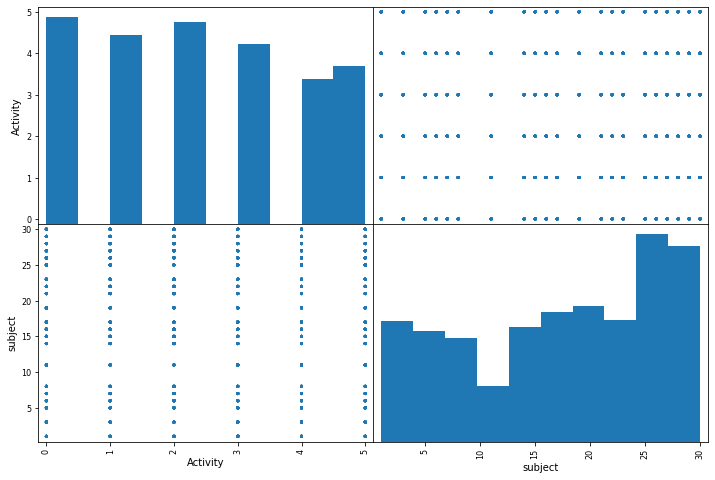

In [9]:
attributes = ["Activity", "subject"]
scatter_matrix(df[attributes], figsize=(12, 8))

-> Activity와 subject 사이에 큰 상관관계를 찾을 수 없으므로 subject 제거!

## 데이터 분리 및 가공

In [10]:
X = df.drop(['subject', 'Activity'], axis=1) # subject와 Activity 열 삭제
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1712,0.206222,-0.002444,-0.071268,-0.178156,0.314980,-0.370122,-0.213753,0.216711,-0.368822,0.036552,...,0.408451,-0.713665,-0.916664,0.588119,-0.052703,0.894190,-0.070566,-0.755230,0.267155,0.024679
3977,0.282294,-0.012231,-0.099561,-0.996835,-0.987955,-0.993352,-0.997153,-0.986303,-0.992624,-0.937254,...,0.343907,-0.817862,-0.978980,0.062581,0.750819,0.511346,0.251906,-0.651619,0.298838,0.152565
1234,0.273758,-0.017118,-0.103736,-0.987935,-0.979853,-0.946703,-0.990838,-0.982117,-0.942339,-0.923553,...,0.335250,-0.617668,-0.865377,-0.040124,0.017382,-0.681370,0.738651,0.595019,-0.953621,-0.035593
6110,0.276925,-0.016379,-0.113905,-0.994179,-0.985307,-0.987641,-0.994852,-0.986149,-0.989065,-0.937656,...,-0.019076,-0.018986,-0.523793,0.226150,0.255297,0.156374,0.045449,-0.530310,-0.110167,-0.236745
2848,0.240835,-0.080724,-0.068141,0.051811,0.004431,-0.275506,-0.020926,0.054578,-0.267934,0.261999,...,-0.019442,-0.458396,-0.760779,-0.043277,0.452240,-0.873381,-0.457884,-0.712941,0.285614,-0.048152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.276784,-0.016878,-0.109958,-0.997900,-0.995861,-0.996574,-0.998218,-0.994789,-0.995670,-0.941706,...,0.430201,-0.755406,-0.917261,0.002945,0.413114,0.781824,0.000760,0.341476,-0.796939,-0.099523
4506,0.136140,-0.016805,-0.092351,0.433866,0.142162,-0.171315,0.426531,0.129115,-0.167513,0.527862,...,0.350043,-0.741892,-0.955179,0.794869,-0.973267,-0.955122,-0.431832,-0.777929,0.232081,-0.059583
6447,0.221593,-0.067587,-0.043594,-0.282947,-0.106276,-0.406134,-0.341022,-0.135074,-0.470107,-0.031811,...,-0.073480,0.091475,-0.194631,0.154466,-0.531665,-0.823702,-0.034841,-0.582284,0.311861,0.213484
6706,0.275251,-0.016865,-0.106315,-0.991711,-0.992670,-0.993497,-0.991738,-0.991609,-0.993037,-0.937474,...,0.646115,-0.825058,-0.967556,-0.349845,-0.362026,0.203792,0.320459,0.466999,-0.563996,-0.428943


In [11]:
y = df['Activity'] # 데이터셋에서 Activity 분리
y

1712    3
3977    2
1234    0
6110    1
2848    5
       ..
1979    0
4506    4
6447    5
6706    0
3490    1
Name: Activity, Length: 7352, dtype: int32

# ExtraTreesClassifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(random_state=42)
extra_clf.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [13]:
from sklearn.model_selection import cross_val_score

extra_score = cross_val_score(extra_clf, X, y, cv=10, scoring="accuracy") # 교차검증
extra_score

array([0.98369565, 0.98913043, 0.99047619, 0.98367347, 0.99047619,
       0.98639456, 0.98911565, 0.98503401, 0.99047619, 0.97687075])

In [14]:
extra_score.mean() # 평균

0.9865343093759243

# VotingClassifier

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [16]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
ada_clf = AdaBoostClassifier(RandomForestClassifier(random_state=42))
gbrt_clf = GradientBoostingClassifier(random_state=42)
bag_clf = BaggingClassifier(
    RandomForestClassifier(random_state=42), bootstrap=False, random_state=42)

In [21]:
log_clf.fit(X, y)
rnd_clf.fit(X, y)
svm_clf.fit(X, y)
ada_clf.fit(X, y)
gbrt_clf.fit(X, y)
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  bootstrap=False, random_state=42)

In [23]:
log_score = cross_val_score(log_clf, X, y, cv=10, scoring="accuracy")
log_score

array([0.98641304, 0.98913043, 0.98095238, 0.98095238, 0.99047619,
       0.9877551 , 0.98231293, 0.9877551 , 0.98503401, 0.98095238])

In [24]:
log_score.mean() # 로지스틱 회귀

0.9851733954451346

In [25]:
rnd_score = cross_val_score(rnd_clf, X, y, cv=10, scoring="accuracy")
rnd_score

array([0.98369565, 0.98777174, 0.97823129, 0.98095238, 0.98639456,
       0.98095238, 0.98911565, 0.97687075, 0.98095238, 0.97823129])

In [26]:
rnd_score.mean() # 랜덤 포레스트

0.9823168071576458

In [27]:
svm_score = cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")
svm_score

array([0.98913043, 0.98913043, 0.98503401, 0.98367347, 0.99047619,
       0.99047619, 0.98911565, 0.98639456, 0.98639456, 0.98503401])

In [28]:
svm_score.mean() # 서포트벡터머신

0.9874859509021

In [29]:
ada_clf_score = cross_val_score(ada_clf, X, y, cv=10, scoring="accuracy")
ada_clf_score

array([0.98369565, 0.98641304, 0.97823129, 0.98639456, 0.98503401,
       0.97959184, 0.98367347, 0.97414966, 0.97823129, 0.9755102 ])

In [30]:
ada_clf_score.mean() # 아다부스트

0.9810925022182786

In [32]:
bag_clf_score = cross_val_score(bag_clf, X, y, cv=10, scoring="accuracy")
bag_clf_score

array([0.98641304, 0.98913043, 0.97687075, 0.98503401, 0.9877551 ,
       0.97959184, 0.98639456, 0.97959184, 0.98367347, 0.97414966])

In [33]:
bag_clf_score.mean() # bagging

0.9828604702750665

=> 서포트벡터머신을 이용하여 훈련했을 때 98.7%로 제일 높은 정확도를 가짐.